# SABR Model Test Code

In [1]:
import imp
import numpy as np
import matplotlib.pyplot as plt
import option_models as opt

In [2]:
### only run this when you changed the class definition
CODE_CHANGED = True
if( CODE_CHANGED ):
    imp.reload(opt)

## 1. Pricing using Hagan's formula (provided)

### (1) SABR for $0<\beta\le 1$

In [3]:
# Parameters
strike = np.linspace(75,125,num=25)
# strike = 110 # should work for scalar value 
forward = 100
sigma = 0.2
texp = 1
alpha = 0.3
rho = 0.25
beta = 1

In [4]:
# Create model
sabr_bsm = opt.sabr.ModelHagan(texp, sigma, alpha=alpha, rho=rho, beta=beta)
sabr_bsm.__dict__

{'beta': 1,
 'texp': 1,
 'sigma': 0.2,
 'alpha': 0.3,
 'rho': 0.25,
 'intr': 0,
 'divr': 0,
 'bsm_model': <option_models.bsm.Model at 0x1859ce62cf8>}

In [5]:
# This is how you price. you can get either price or bsm_vol
price = sabr_bsm.price(strike, forward)
bsm_vol = sabr_bsm.bsm_vol(strike, forward)

price, bsm_vol

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([0.19740451, 0.19730124, 0.19731138, 0.19742763, 0.19764276,
        0.19794962, 0.19834124, 0.19881083, 0.19935186, 0.19995804,
        0.2006234 , 0.20134229, 0.20210938, 0.20291966, 0.2037685 ,
        0.20465155, 0.20556483, 0.20650464, 0.2074676 , 0.20845059,
        0.20945078, 0.21046559, 0.21149265, 0.21252984, 0.21357521]))

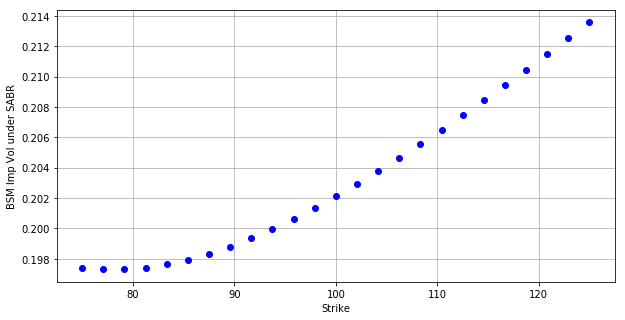

In [9]:
# volatility smile plot: try with different parameters
plt.figure(figsize=(10,5))
plt.plot(strike, bsm_vol, 'bo')
#plt.axis([0, 6, 0, 20])
plt.ylabel('BSM Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [10]:
# implied vol (sigma in this case)
# you should get back the original sigma
sabr_bsm.impvol(price[11], strike[11], forward)

0.19999999999936008

### (2) SABR for $\beta=0$

In [11]:
strike = np.linspace(75,125,num=25)
#strike = 1
forward = 100
sigma = 20
texp = 1
alpha = 0.5
rho = -0.25
beta = 0

In [12]:
nvol = opt.sabr.norm_vol(strike, forward, texp, sigma, alpha=alpha, rho=rho)

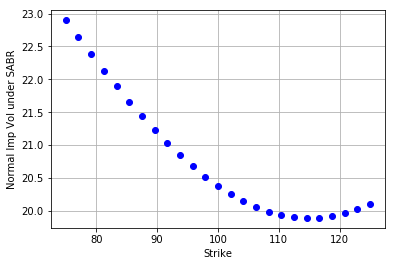

In [14]:
plt.plot(strike, nvol, 'bo')
#plt.axis([0, 6, 0, 20])
plt.ylabel('Normal Imp Vol under SABR')
plt.xlabel('Strike')
plt.grid()
plt.show()

In [15]:
sabr_norm = opt.sabr.ModelNormalHagan(texp, sigma, alpha=alpha, rho=rho)
sabr_norm.__dict__

{'beta': 0.0,
 'texp': 1,
 'sigma': 20,
 'alpha': 0.5,
 'rho': -0.25,
 'intr': 0,
 'divr': 0,
 'normal_model': <option_models.normal.Model at 0x1859ce62978>}

In [16]:
price = sabr_norm.price(strike, forward)
norm_vol = sabr_norm.norm_vol(strike, forward)
price, norm_vol

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([22.898288  , 22.63620745, 22.38073263, 22.1326082 , 21.89263645,
        21.66167534, 21.44063425, 21.2304669 , 21.03216098, 20.84672415,
        20.67516621, 20.5184775 , 20.37760417, 20.25342105, 20.1467038 ,
        20.05810179, 19.98811408, 19.93707021, 19.9051177 , 19.89221722,
        19.89814614, 19.92250965, 19.9647587 , 20.02421277, 20.10008575]))

In [17]:
# implied vol (e.g. sigma)
sabr_norm.impvol(price[11], strike[11], forward)

19.999999999999922

### (3) Smile calibration to 3 options

In [36]:
strike3 = np.array([90, 100, 110])
price3 = sabr_norm.price(strike3, forward)
norm_vol3 = sabr_norm.norm_vol(strike3, forward)

price3, norm_vol3

(array([14.37778096,  8.12948788,  3.9368394 ]),
 array([21.18982474, 20.37760417, 19.94575372]))

In [37]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(norm_vol3, strike3, forward, is_vol=True)

C:\Users\caoxi\HW3\option_models\sabr.py:66: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt(1 + zeta*(zeta - 2*rho))
C:\Users\caoxi\HW3\option_models\sabr.py:70: RuntimeWarning: invalid value encountered in less
  ind = np.where(abs(zeta) < 1e-5)
C:\Users\caoxi\HW3\option_models\sabr.py:73: RuntimeWarning: invalid value encountered in greater_equal
  ind = np.where(zeta >= 1e-5)
C:\Users\caoxi\HW3\option_models\sabr.py:76: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(zeta <= -1e-5)


(20.000000000007592, 0.4999999999660513, -0.2500000000440035)

In [38]:
# makre sure this return the original sigma, alpha, rho
sabr_norm.calibrate3(price3, strike3, forward, is_vol=False)

C:\Users\caoxi\HW3\option_models\sabr.py:66: RuntimeWarning: invalid value encountered in sqrt
  yy = np.sqrt(1 + zeta*(zeta - 2*rho))
C:\Users\caoxi\HW3\option_models\sabr.py:70: RuntimeWarning: invalid value encountered in less
  ind = np.where(abs(zeta) < 1e-5)
C:\Users\caoxi\HW3\option_models\sabr.py:73: RuntimeWarning: invalid value encountered in greater_equal
  ind = np.where(zeta >= 1e-5)
C:\Users\caoxi\HW3\option_models\sabr.py:76: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(zeta <= -1e-5)


(20.000000000007592, 0.4999999999660513, -0.2500000000440035)

Below is same for sabr_bsm

In [39]:
strike3 = np.array([90, 100, 110])
price3 = price = sabr_bsm.price(strike3, forward)
bsm_vol3 = sabr_bsm.bsm_vol(strike3, forward)

price3, bsm_vol3

(array([13.55352055,  8.0492952 ,  4.52747026]),
 array([0.19891353, 0.20210938, 0.20631472]))

In [40]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(bsm_vol3, strike3, forward, is_vol=True)

(0.19999999999997953, 0.2999999999796928, 0.25000000004069667)

In [41]:
# makre sure this return the original sigma, alpha, rho
sabr_bsm.calibrate3(price3, strike3, forward, is_vol=False)

(0.2000000000001238, 0.2999999999659503, 0.25000000004743395)

## 2. Pricing under MC method

In [42]:
strike = np.linspace(75,125,num=25)
forward = 100

In [43]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_mc = opt.sabr.ModelBsmMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                  alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000001859CE62CF8>}


In [44]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.78945952, 23.90856091, 22.0841905 , 20.32207962, 18.62706993,
        17.01231959, 15.48671719, 14.04531117, 12.6974691 , 11.44246251,
        10.28468225,  9.22117456,  8.24746618,  7.36172734,  6.5645055 ,
         5.84405025,  5.19520816,  4.61869708,  4.10227318,  3.6372484 ,
         3.22132808,  2.84985904,  2.52155434,  2.22972533,  1.96927943]))

Repeat the same for beta = 0

In [45]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_mc = opt.sabr.ModelNormalMC(sabr_norm.texp, sabr_norm.sigma, 
                                   alpha=sabr_norm.alpha, rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000001859CE62978>}


In [46]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_mc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.53016606, 24.69951637, 22.90709361, 21.15637477, 19.45280679,
        17.79901216, 16.20447917, 14.67342718, 13.2108942 , 11.8200496 ,
        10.51281435,  9.29536944,  8.16641437,  7.12284303,  6.16843043,
         5.30474461,  4.52974335,  3.84771233,  3.24950168,  2.73398661,
         2.28722654,  1.90667086,  1.5819194 ,  1.30568372,  1.07478839]))

## 3. Pricing under conditional MC method

In [47]:
strike = np.linspace(75,125,num=25)
forward = 100

In [48]:
# instantiate mc model from the hagan model's parameters
print(sabr_bsm.__dict__)
sabr_bsm_cmc = opt.sabr.ModelBsmCondMC(sabr_bsm.texp, sabr_bsm.sigma, 
                                       alpha=sabr_bsm.alpha, rho=sabr_bsm.rho, beta=sabr_bsm.beta)

{'beta': 1, 'texp': 1, 'sigma': 0.2, 'alpha': 0.3, 'rho': 0.25, 'intr': 0, 'divr': 0, 'bsm_model': <option_models.bsm.Model object at 0x000001859CE62CF8>}


In [49]:
price_hagan = sabr_bsm.price(strike, forward)
price_mc = sabr_bsm_cmc.price(strike, forward)

# make sure the two prices are similar
price_hagan, price_mc

(array([25.54990056, 23.6710906 , 21.84772723, 20.08808242, 18.39998119,
        16.79046024, 15.26547396, 13.82967094, 12.48625486, 11.23693323,
        10.08194855,  9.0201795 ,  8.0492952 ,  7.16594441,  6.36596195,
         5.64457698,  4.99661108,  4.41665739,  3.8992357 ,  3.43892089,
         3.03044477,  2.66877274,  2.34915782,  2.06717523,  1.81874082]),
 array([25.49700063, 23.61930546, 21.79717566, 20.03885955, 18.3521552 ,
        16.74407178, 15.22053821, 13.78618182, 12.44419048, 11.19626193,
        10.04263467,  8.98218834,  8.0125967 ,  7.13051549,  6.33178747,
         5.61164946,  4.96492951,  4.38622545,  3.87005957,  3.41100709,
         3.00379809,  2.64339452,  2.3250446 ,  2.04431784,  1.79712389]))

Repeat the same for beta = 0

In [50]:
# instantiate mc model from the hagan model's parameters
print(sabr_norm.__dict__)
sabr_norm_cmc = opt.sabr.ModelNormalCondMC(sabr_norm.texp, sabr_norm.sigma, alpha=sabr_norm.alpha, 
                                        rho=sabr_norm.rho, beta=sabr_norm.beta)

{'beta': 0.0, 'texp': 1, 'sigma': 20, 'alpha': 0.5, 'rho': -0.25, 'intr': 0, 'divr': 0, 'normal_model': <option_models.normal.Model object at 0x000001859CE62978>}


In [51]:
price_hagan = sabr_norm.price(strike, forward)
price_mc = sabr_norm_cmc.price(strike, forward)
    
# make sure the two prices are similar
price_hagan, price_mc

(array([26.59695921, 24.75853528, 22.95673964, 21.19638261, 19.4826555 ,
        17.82107839, 16.21741812, 14.67757267, 13.20742012, 11.81263312,
        10.49846428,  9.26951283,  8.12948788,  7.08098803,  6.12531972,
         5.26237563,  4.49059068,  3.80698489,  3.20729256,  2.68616625,
         2.23743499,  1.85439056,  1.53007481,  1.2575435 ,  1.03008923]),
 array([26.56466558, 24.72668148, 22.92577242, 21.16678292, 19.45492432,
        17.79571766, 16.19490707, 14.65834056, 13.19181691, 11.80090071,
        10.49071142,  9.26569721,  8.12940858,  7.08429093,  6.13151667,
         5.27087643,  4.50074469,  3.81812758,  3.2187912 ,  2.69745927,
         2.24806087,  1.864004  ,  1.53844994,  1.26456617,  1.03574122]))

## Compare the MC variance between brute-force MC and conditional MC
For this, you should not use the random number seed

In [52]:
# for beta = 1, the MC variance between MC method and conditional MC are respectively
bsmPriceMC = np.array([sabr_bsm_mc.price(strike, forward) for i in range(100)])
bsmPriceCondMC = np.array([sabr_bsm_cmc.price(strike, forward) for i in range(100)])
bsmPriceMC.std(axis = 0), bsmPriceCondMC.std(axis = 0)

(array([0.1948357 , 0.19202773, 0.18835878, 0.18486368, 0.18078396,
        0.17584975, 0.17094984, 0.16623913, 0.1612324 , 0.15560148,
        0.14946987, 0.14282035, 0.13551136, 0.12801375, 0.1207186 ,
        0.11363086, 0.10678221, 0.10056799, 0.09452462, 0.08896724,
        0.08397016, 0.07915108, 0.07446021, 0.07015588, 0.06638198]),
 array([0.05610954, 0.0560938 , 0.05598874, 0.05576734, 0.05540365,
        0.05487485, 0.05416303, 0.05325662, 0.05215136, 0.05085045,
        0.04936431, 0.04770964, 0.0459082 , 0.04398537, 0.04196864,
        0.03988619, 0.03776562, 0.03563299, 0.03351202, 0.03142362,
        0.02938563, 0.02741271, 0.02551642, 0.02370545, 0.02198582]))

In [53]:
# for beta = 0, the MC variance between MC method and conditional MC are respectively
normPriceMC = np.array([sabr_norm_mc.price(strike, forward) for i in range(100)])
normPriceCondMC = np.array([sabr_norm_cmc.price(strike, forward) for i in range(100)])
normPriceMC.std(axis = 0), normPriceCondMC.std(axis = 0)

(array([0.16661686, 0.16330095, 0.1596899 , 0.15566293, 0.15123094,
        0.14650885, 0.14118051, 0.13546432, 0.12959655, 0.12383728,
        0.11844521, 0.1132078 , 0.10769571, 0.10245765, 0.09733148,
        0.09192099, 0.0862264 , 0.08022281, 0.07410794, 0.06816676,
        0.06237543, 0.05704821, 0.05219499, 0.04753791, 0.04304629]),
 array([0.0347927 , 0.03302952, 0.03116354, 0.02920727, 0.02717874,
        0.02510225, 0.02300896, 0.02093698, 0.01893088, 0.01704002,
        0.01531512, 0.01380241, 0.0125353 , 0.01152501, 0.01075423,
        0.0101786 , 0.00973704, 0.00936645, 0.00901401, 0.00864338,
        0.00823525, 0.00778446, 0.0072958 , 0.00677999, 0.00625028]))